# Model Comparison Visualization

This notebook allows you to compare predictions from different models for a specific experiment and timestep by stacking their visualization plots side-by-side.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import numpy as np

In [2]:
def find_model_directories(experiment_name, test_results_path="./test_results"):
    """
    Find all model directories for a given experiment.
    
    Args:
        experiment_name (str): Name of the experiment (e.g., 'ActivityLong70N')
        test_results_path (str): Path to test_results directory
    
    Returns:
        dict: Dictionary mapping model names to their directory paths
    """
    experiment_path = Path(test_results_path) / experiment_name
    
    if not experiment_path.exists():
        print(f"Experiment '{experiment_name}' not found in {test_results_path}")
        return {}
    
    model_dirs = {}
    
    # Get all subdirectories (model directories)
    for model_dir in experiment_path.iterdir():
        if model_dir.is_dir():
            # Extract model name from directory name (first part before '_')
            model_name = model_dir.name.split('_')[0]
            model_dirs[model_name] = str(model_dir)
    
    return model_dirs

def load_and_stack_images(experiment_name, image_index=40, test_results_path="./test_results", figsize=(20, 4)):
    """
    Load and stack images from different models side-by-side.
    
    Args:
        experiment_name (str): Name of the experiment
        image_index (int): Index of the image to load (e.g., 40 for '40.jpg')
        test_results_path (str): Path to test_results directory
        figsize (tuple): Figure size for the plot
    
    Returns:
        matplotlib.figure.Figure: Figure with stacked images
    """
    model_dirs = find_model_directories(experiment_name, test_results_path)
    
    if not model_dirs:
        print(f"No models found for experiment '{experiment_name}'")
        return None
    
    # Sort models for consistent ordering
    sorted_models = sorted(model_dirs.keys())
    
    # Check which models have the requested image
    available_models = []
    for model in sorted_models:
        image_path = Path(model_dirs[model]) / f"{image_index}.jpg"
        if image_path.exists():
            available_models.append(model)
        else:
            print(f"Warning: {image_index}.jpg not found for model '{model}'")
    
    if not available_models:
        print(f"No models have image '{image_index}.jpg' for experiment '{experiment_name}'")
        return None
    
    # Create subplot figure
    fig, axes = plt.subplots(1, len(available_models), figsize=figsize)
    
    # Handle case where there's only one model
    if len(available_models) == 1:
        axes = [axes]
    
    # Load and display images
    for i, model in enumerate(available_models):
        image_path = Path(model_dirs[model]) / f"{image_index}.jpg"
        
        try:
            img = mpimg.imread(str(image_path))
            axes[i].imshow(img)
            axes[i].set_title(f"{model}", fontsize=14, fontweight='bold')
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image for {model}: {e}")
            axes[i].text(0.5, 0.5, f"Error loading\n{model}", 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"Model Comparison - {experiment_name} (Timestep {image_index})", 
                 y=1.02, fontsize=16, fontweight='bold')
    
    return fig

def list_available_experiments(test_results_path="./test_results"):
    """
    List all available experiments.
    
    Args:
        test_results_path (str): Path to test_results directory
    
    Returns:
        list: List of experiment names
    """
    test_results = Path(test_results_path)
    
    if not test_results.exists():
        print(f"Test results directory '{test_results_path}' not found")
        return []
    
    experiments = []
    for item in test_results.iterdir():
        if item.is_dir() and not item.name.startswith('.'):
            experiments.append(item.name)
    
    return sorted(experiments)

## Available Experiments

First, let's see what experiments are available:

In [3]:
# List all available experiments
experiments = list_available_experiments()
print("Available experiments:")
for exp in experiments:
    print(f"  - {exp}")

Available experiments:
  - ActivityLong7000N
  - ActivityLong7000N_MSE
  - ActivityLong700N
  - ActivityLong700N_MSE
  - ActivityLong70N
  - ActivityLong70N_MSE
  - ActivityShort7000N
  - ActivityShort700N
  - ActivityShort70N
  - ActivityShort7NeuronsTest
  - ETTh2_336_96_DLinear_ETTh2_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0
  - ETTh2_96_192_Autoformer_ETTh2_ftM_sl96_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0
  - ETTh2_96_192_Informer_ETTh2_ftM_sl96_ll48_pl192_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0
  - ETTh2_96_336_Autoformer_ETTh2_ftM_sl96_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0
  - ETTh2_96_720_Autoformer_ETTh2_ftM_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0
  - ETTh2_96_96_Autoformer_ETTh2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0
  - ETTh2_96_96_Informer_ETTh2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0
  - Mean_16_8_Mean_Activit

## Model Comparison Visualization

Configure the parameters below and run the cell to generate the comparison:

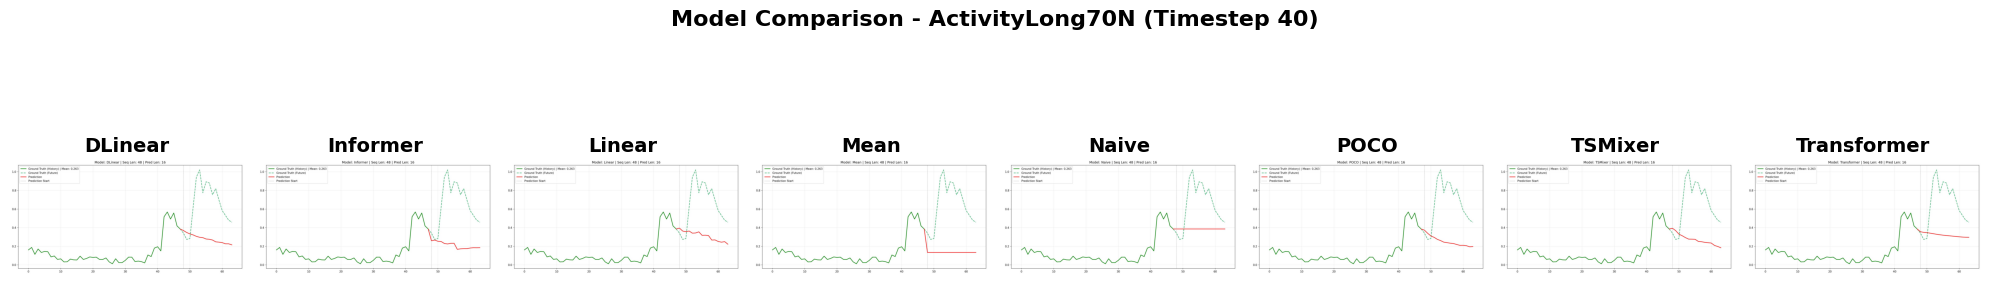

In [4]:
# Configuration parameters
EXPERIMENT_NAME = "ActivityLong70N"  # Change this to your desired experiment
IMAGE_INDEX = 40  # Change this to your desired timestep
FIGURE_SIZE = (20, 4)  # Width, Height in inches

# Generate the comparison
fig = load_and_stack_images(
    experiment_name=EXPERIMENT_NAME,
    image_index=IMAGE_INDEX,
    figsize=FIGURE_SIZE
)

if fig:
    plt.show()
    
    # Optionally save the figure
    # output_path = f"model_comparison_{EXPERIMENT_NAME}_timestep_{IMAGE_INDEX}.png"
    # fig.savefig(output_path, dpi=300, bbox_inches='tight')
    # print(f"Saved comparison to {output_path}")

## Explore Models for a Specific Experiment

Check which models are available for a specific experiment:

In [5]:
# Check available models for a specific experiment
experiment_to_check = "ActivityLong70N"  # Change this as needed

model_dirs = find_model_directories(experiment_to_check)
print(f"Models available for '{experiment_to_check}':")
for model_name, path in sorted(model_dirs.items()):
    print(f"  - {model_name}: {path}")
    
    # Check available images in this model directory
    image_files = glob.glob(os.path.join(path, "*.jpg"))
    image_indices = sorted([int(Path(f).stem) for f in image_files if Path(f).stem.isdigit()])
    print(f"    Available timesteps: {image_indices[:5]}{'...' if len(image_indices) > 5 else ''}")

Models available for 'ActivityLong70N':
  - DLinear: test_results/ActivityLong70N/DLinear_48_16_DLinear_Activity_ftM_sl48_ll16_pl16_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0
    Available timesteps: [0, 20, 40, 60, 80]...
  - Informer: test_results/ActivityLong70N/Informer_48_16_Informer_Activity_ftM_sl48_ll16_pl16_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0
    Available timesteps: [0, 20, 40, 60, 80]...
  - Linear: test_results/ActivityLong70N/Linear_48_16_Linear_Activity_ftM_sl48_ll16_pl16_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0
    Available timesteps: [0, 20, 40, 60, 80]...
  - Mean: test_results/ActivityLong70N/Mean_48_16_Mean_Activity_ftM_sl48_pl16_Exp
    Available timesteps: [0, 20, 40, 60, 80]...
  - Naive: test_results/ActivityLong70N/Naive_48_16_Naive_Activity_ftM_sl48_pl16_Exp
    Available timesteps: [0, 20, 40, 60, 80]...
  - POCO: test_results/ActivityLong70N/POCO_48_16_POCO_Activity_ftM_sl48_ll16_pl16_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_

## Batch Processing - Multiple Timesteps

Generate comparisons for multiple timesteps at once:


=== Timestep 0 ===


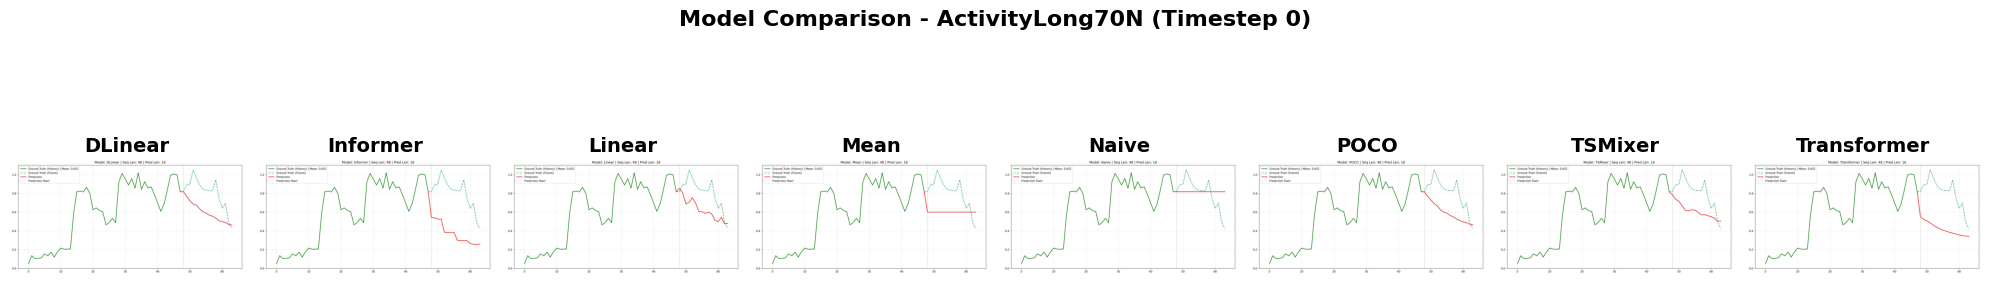


=== Timestep 20 ===


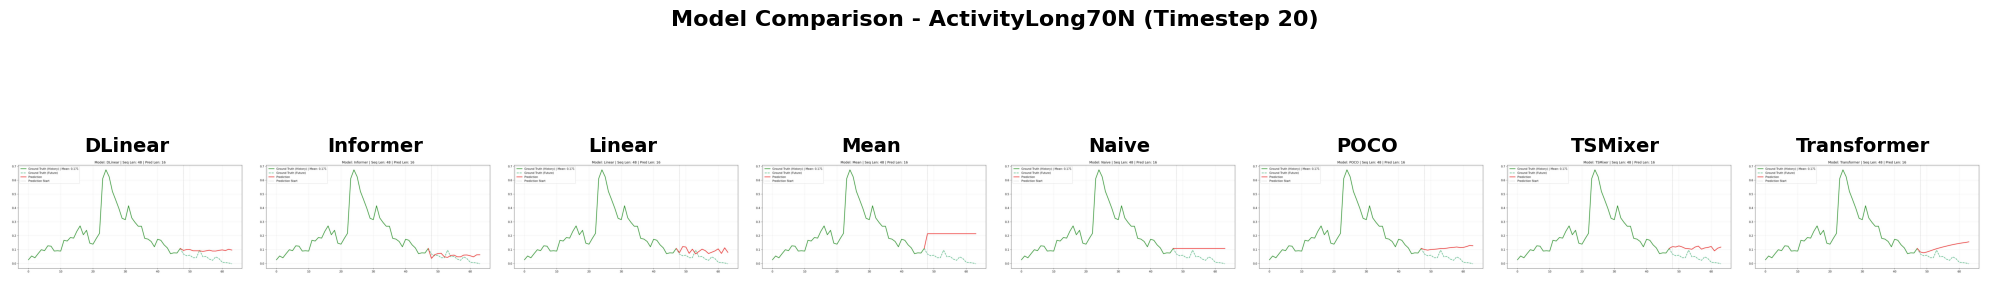


=== Timestep 40 ===


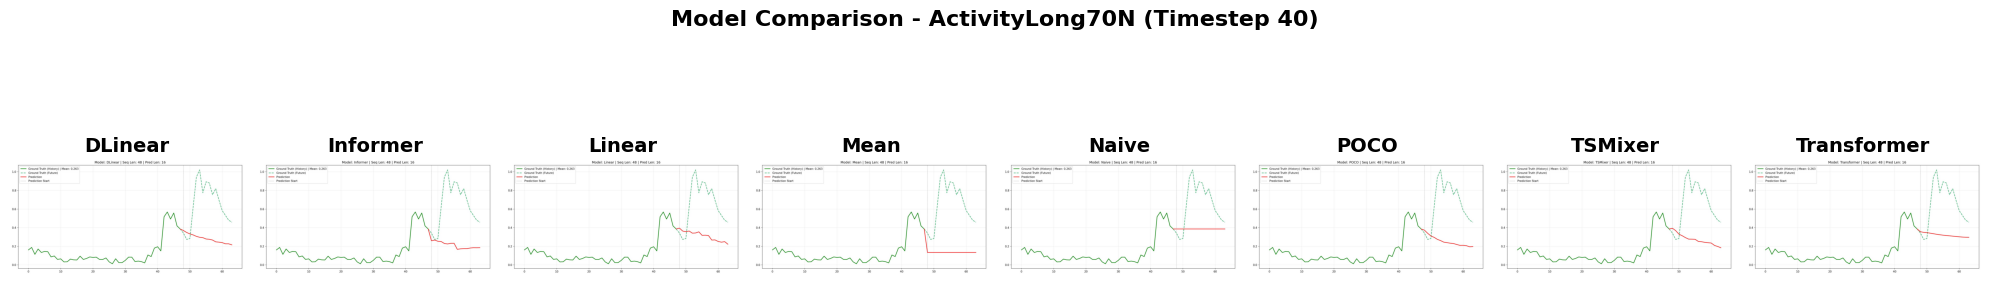


=== Timestep 60 ===


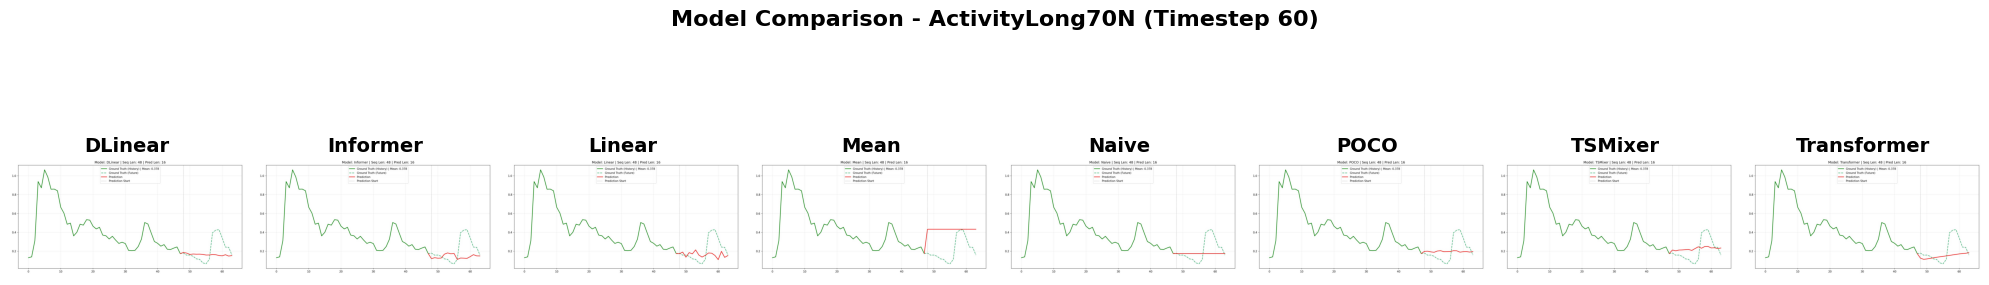


=== Timestep 80 ===


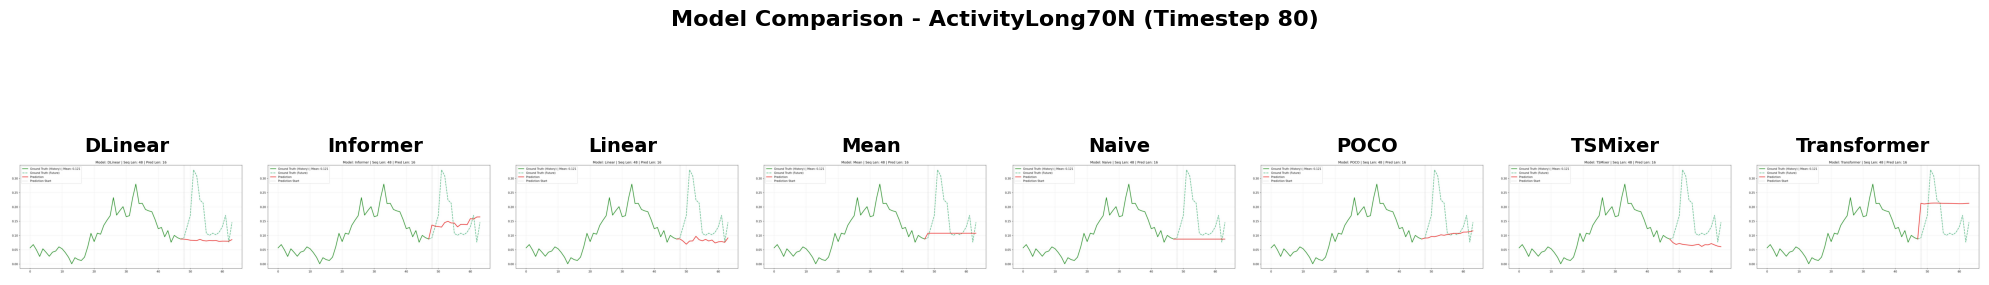

In [6]:
# Batch processing configuration
EXPERIMENT_NAME = "ActivityLong70N"
TIMESTEPS_TO_COMPARE = [0, 20, 40, 60, 80]  # Add the timesteps you want to compare

for timestep in TIMESTEPS_TO_COMPARE:
    print(f"\n=== Timestep {timestep} ===")
    fig = load_and_stack_images(
        experiment_name=EXPERIMENT_NAME,
        image_index=timestep,
        figsize=(20, 4)
    )
    
    if fig:
        plt.show()
        plt.close(fig)  # Close to free memory